In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## Spatial Domain Enhancements

### Creating Negatives

In [28]:
def Invert(I):
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            I[i,j] = 255 - I[i,j]
    return I

def create_negative(I):
    I[:,:,0] = Invert(I[:,:,0])
    I[:,:,1] = Invert(I[:,:,1])
    I[:,:,2] = Invert(I[:,:,2])
    return I

# Test Code 
# imPath = r'E:\DataSet\frame_0106.jpg'
# frame = cv2.imread(imPath)
# negative_frame =create_negative(frame)
# plt.imshow(negative_frame[:,:,::-1])
# plt.imsave('E:\\Enhanced_Images\\negatives\\sample.jpg',negative_frame[:,:,::-1])

In [29]:
imPath = 'E:\DataSet'
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    negative_frame = create_negative(frame)
    cv2.imwrite('E:\\Enhanced_Images\\negatives\\'+imName,negative_frame)

KeyboardInterrupt: 

In [2]:
imPath = 'E:\\Enhanced_Images\\negatives\\'
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    cv2.imshow('Display',frame)
    k = cv2.waitKey(90) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()

## Gamma Correction with Gray-Level Slicing

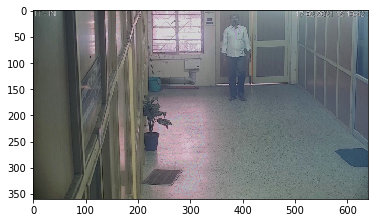

In [3]:
def Gamma_Slice(I):
    min1 = I.mean() - I.std()
    max1 = I.mean() + I.std()
    max2 = I.mean() + 2*I.std()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i,j] > min1 and I[i,j] <max1:
                I[i,j] = np.power(I[i,j],1.01)
            elif I[i,j]>max2:
                I[i,j] = np.power(I[i,j],0.97)
                
    return I

def Gamma_Correction_Slicing(I):
    I[:,:,0] = Gamma_Slice(I[:,:,0])
    I[:,:,1] = Gamma_Slice(I[:,:,1])
    I[:,:,2] = Gamma_Slice(I[:,:,2])
    return I

# Test Code 
imPath = r'E:\\DataSet\\frame_0105.jpg'
frame = cv2.imread(imPath)
Gamma_frame = Gamma_Correction_Slicing(frame)

plt.imshow(Gamma_frame[:,:,::-1])

# plt.imsave('E:\\Enhanced_Images\\negatives\\sample.jpg',negative_frame[:,:,::-1])


## Contrast Stretching

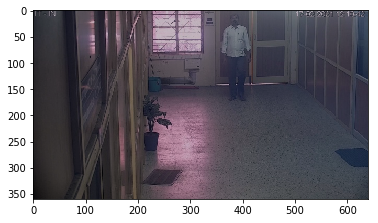

In [4]:
def Contrast(I):
    min1 = I.min()
    max1 = I.max()
    min2 = 0
    max2 = 255
    max2 = I.mean() + 2*I.std()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            i1 = I[i,j]
            I[i,j] = ((i1-min1)*(max2-min2))/(max1-min1)
                
    return I

def Contrast_Stretching(I):
    I[:,:,0] = Contrast(I[:,:,0])
    I[:,:,1] = Contrast(I[:,:,1])
    I[:,:,2] = Contrast(I[:,:,2])
    return I

# Test Code 
imPath = r'E:\\DataSet\\frame_0105.jpg'
frame = cv2.imread(imPath)
Contrast_frame = Contrast_Stretching(frame)

plt.imshow(Contrast_frame[:,:,::-1])

## Logarithmic Transformation

## Not relevant for our dataset

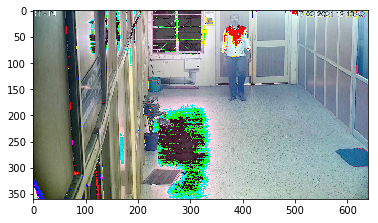

In [44]:
def Log(I):

    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            I[i,j] = 200 * np.log(1+I[i,j])
                
    return I

def Log_Transformation(I):
    I[:,:,0] = Log(I[:,:,0])
    I[:,:,1] = Log(I[:,:,1])
    I[:,:,2] = Log(I[:,:,2])
    return I

# Test Code 
imPath = r'E:\\DataSet\\frame_0105.jpg'
frame = cv2.imread(imPath)
Log_frame = Log_Transformation(frame)

plt.imshow(Log_frame[:,:,::-1])

## Histogram Equalization

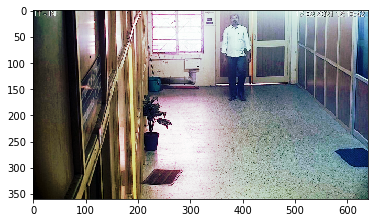

In [6]:
def Hist(I):
    Num_Pixels = np.zeros(256)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            Num_Pixels[I[i,j]] = Num_Pixels[I[i,j]] + 1
    PDF = Num_Pixels/sum(Num_Pixels)
    CDF = np.cumsum(PDF)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            I[i,j] = 255*CDF[I[i,j]]
            
    return I

def Hist_Eq(I):
    I[:,:,0] = Hist(I[:,:,0])
    I[:,:,1] = Hist(I[:,:,1])
    I[:,:,2] = Hist(I[:,:,2])
    return I

# Test Code 
imPath = r'E:\\DataSet\\frame_0105.jpg'
frame = cv2.imread(imPath)
Hist_frame = Hist_Eq(frame)
plt.imshow(Hist_frame[:,:,::-1])
# frame[:,:,0] = cv2.equalizeHist(frame[:,:,0])
# frame[:,:,1] = cv2.equalizeHist(frame[:,:,1])
# frame[:,:,2] = cv2.equalizeHist(frame[:,:,2])
# plt.imshow(frame)
# Double_Transform = Gamma_Correction(Log_frame)

# plt.imshow(Double_Transform[:,:,::-1])

## Histogram Equalization followed by Gamma Correction

In [8]:
def Gamma(I):
#     min1 = I.mean() - I.std()
#     max1 = I.mean() + I.std()
#     max2 = I.mean() + 2*I.std()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            I[i,j] = np.power(I[i,j],0.90)
                
    return I

def Gamma_Correction(I):
    I[:,:,0] = Gamma(I[:,:,0])
    I[:,:,1] = Gamma(I[:,:,1])
    I[:,:,2] = Gamma(I[:,:,2])
    return I

def Histogram_Equalization_GammaCorrection(I):
    hist = Hist_Eq(I)
    gamma = Gamma_Correction(hist)
    return gamma
    

imPath = r'E:\\DataSet\\frame_0105.jpg'
frame = cv2.imread(imPath)

enhanced = Histogram_Equalization_GammaCorrection(frame)
cv2.resize(enhanced,dsize=(800,600))
cv2.imshow('frame',enhanced)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [95]:
imPath = 'E:\DataSet'
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    enhanced = Histogram_Equalization_GammaCorrection(frame)
    cv2.imwrite('E:\\Enhanced_Images\\enhanced\\'+imName,enhanced)

In [2]:
imPath = 'E:\\Enhanced_Images\\enhanced\\'
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    cv2.imshow('Display',frame)
    k = cv2.waitKey(90) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()